<a href="https://colab.research.google.com/github/jiyun126/-/blob/main/2021142033_%ED%95%9C%EC%A7%80%EC%9C%A4_5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-21e8f5da43bd>:53: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-21e8f5da43bd>:53: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-21e8f5da43bd>:53: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-21e8f5da43bd>:53: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages

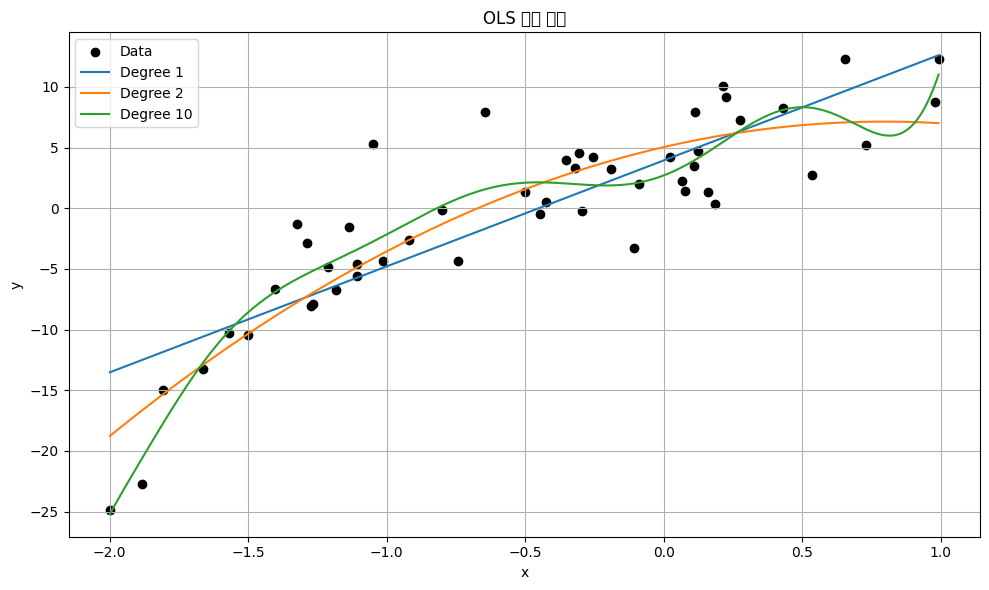

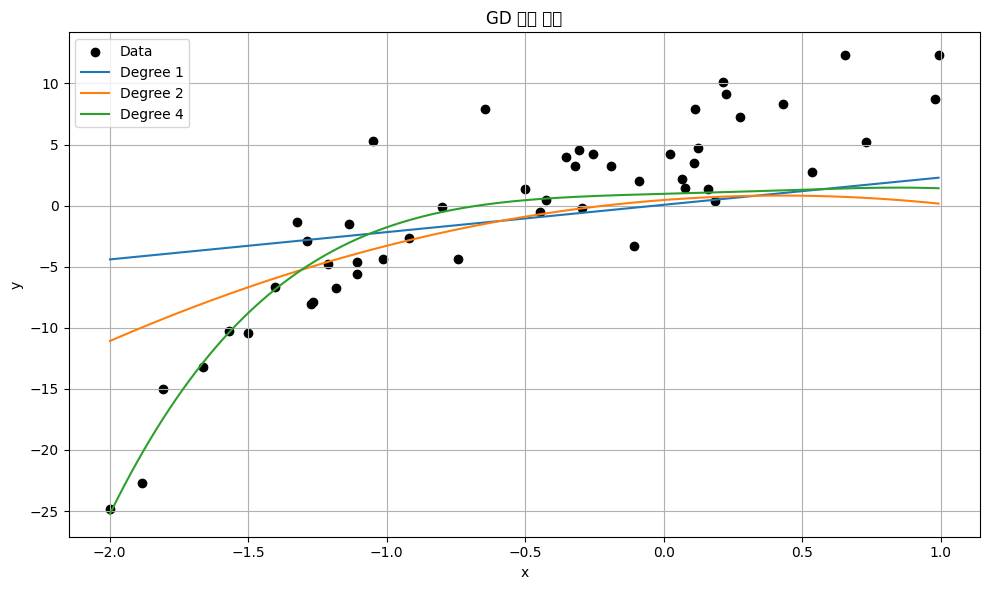


OLS parameter:
Degree 1: [8.73592461 3.94188011]
Degree 2: [-3.31676315  5.27924916  5.03906362]
Degree 10: [ -2.15841396 -11.06845325  -8.88620278  36.4912823   59.53548377
 -20.12073817 -70.59489937  -7.17740053  24.11081436   8.74663577
   2.70561086]

GD parameter:
Degree 1: [0.06825886 2.23603262]
Degree 2: [ 0.46137619  1.71642697 -2.02921761]
Degree 4: [ 0.96730967  0.61615766 -0.09587643  0.9784752  -1.04970844]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data0405.csv")
x = df['x'].values
y = df['y'].values
x_range = np.linspace(min(x), max(x), 500)

def ols_regression(x, y, degrees):
    models = {}
    for deg in degrees:
        coeffs = np.polyfit(x, y, deg)
        models[deg] = coeffs
    return models

def gradient_descent_poly(x, y, degree, lr=0.001, epochs=500):
    X = np.vander(x, degree + 1, increasing=True)
    weights = np.zeros(X.shape[1])
    for _ in range(epochs):
        y_pred = X.dot(weights)
        gradient = (1/len(x)) * X.T.dot(y_pred - y)
        weights -= lr * gradient
    return weights

def gd_regression(x, y, degrees):
    models = {}
    for deg in degrees:
        weights = gradient_descent_poly(x, y, deg)
        models[deg] = weights
    return models

# 모델 생성
ols_models = ols_regression(x, y, [1, 2, 10])
gd_models = gd_regression(x, y, [1, 2, 4])

# 시각화
def plot_models(x, y, x_range, models, method_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='black', label='Data')
    for deg, coeffs in models.items():
        if method_name == "OLS":
            y_pred = np.polyval(coeffs, x_range)
        else:
            X_range = np.vander(x_range, len(coeffs), increasing=True)
            y_pred = X_range.dot(coeffs)
        plt.plot(x_range, y_pred, label=f"Degree {deg}")
    plt.title(f"{method_name} 회귀 모델")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_models(x, y, x_range, ols_models, "OLS")
plot_models(x, y, x_range, gd_models, "GD")

print("\nOLS parameter:")
for deg, coeffs in ols_models.items():
    print(f"Degree {deg}: {coeffs}")

print("\nGD parameter:")
for deg, weights in gd_models.items():
    print(f"Degree {deg}: {weights}")